<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Descretisation/EqualWidthDescretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/titanic.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
use_cols=['Cabin','Pclass','Age','Fare','Survived']

In [36]:
data = data[use_cols]

In [37]:
data['Cabin'] = data['Cabin'].str[0]

In [38]:
data.isnull().sum()

Cabin       687
Pclass        0
Age         177
Fare          0
Survived      0
dtype: int64

In [39]:
for col in data.columns:
  data[col].fillna(data[col].mode()[0], inplace = True)

In [40]:
data.isnull().sum()

Cabin       0
Pclass      0
Age         0
Fare        0
Survived    0
dtype: int64

In [41]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 100, stratify = y)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


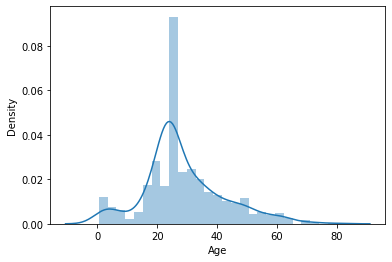

In [44]:
sns.distplot(X_train['Age'])

Equal Width Decretization

In [45]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [47]:
discri = EqualWidthDiscretiser(variables = ['Age','Fare'], bins = 10, return_object= False)

In [48]:
discri.fit(X_train)

EqualWidthDiscretiser(variables=['Age', 'Fare'])

In [49]:
discri.binner_dict_

{'Age': [-inf,
  8.378,
  16.336000000000002,
  24.294000000000004,
  32.252,
  40.21,
  48.168000000000006,
  56.126000000000005,
  64.084,
  72.042,
  inf],
 'Fare': [-inf,
  51.23292,
  102.46584,
  153.69876,
  204.93168,
  256.1646,
  307.39752,
  358.63044,
  409.86336,
  461.09628,
  inf]}

In [50]:
discri.transform(X_train)

,Cabin,Pclass,Age,Fare
410,C,3,2,0
824,C,3,0,0
11,C,1,7,0
851,C,3,9,0
219,C,2,3,0
...,...,...,...,...
179,C,3,4,0
576,C,2,4,0
149,C,2,5,0
227,C,3,2,0


In [51]:
X_train = discri.transform(X_train)
X_test = discri.transform(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


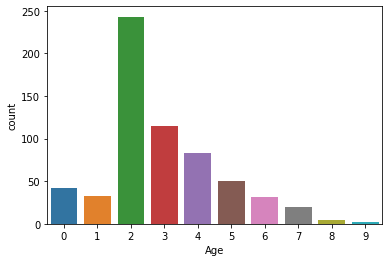

In [52]:
sns.countplot(X_train['Age'])